# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

## Initial Imports

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

 ### Use extension function to specify plugin

In [2]:
# Initialize the Panel Extensions (for Plotly)
pn.extension("plotly")

### Import hvplot.pandas after pn.extension

In [3]:
# Import hvplot.pandas after pn.extension
import hvplot.pandas

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [5]:
# Using the len function, confirm the API Key was imported successfully
print(len(map_box_api))

88


In [6]:
# Set the mapbox API
px.set_mapbox_access_token(map_box_api)

# Import Data

In [7]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [77]:
# Getting the data from the top 10 expensive neighbourhoods
neighbourhood_prices = to_data.groupby("neighbourhood").mean()

# Sort the values to view the top 10 most expensive neighbourhoods 
neighbourhood_prices.sort_values("average_house_value", ascending=False, inplace=True)
top_10_most_expensive_neighbourhoods = neighbourhood_prices.iloc[0:10]

# Display the data
# top_10_most_expensive_neighbourhoods

In [78]:
# Calculate the mean number of dwelling types units per year
average_dwelling_costs = to_data.groupby("year").mean()

# Display the data
# average_dwelling_costs


In [79]:
# Calculate the average monthly shelter costs for owned and rented dwellings
average_monthly_shelter_costs = average_dwelling_costs[["shelter_costs_owned", "shelter_costs_rented"]]

# Display the data 
# average_monthly_shelter_costs

### Panel Visualization Functions

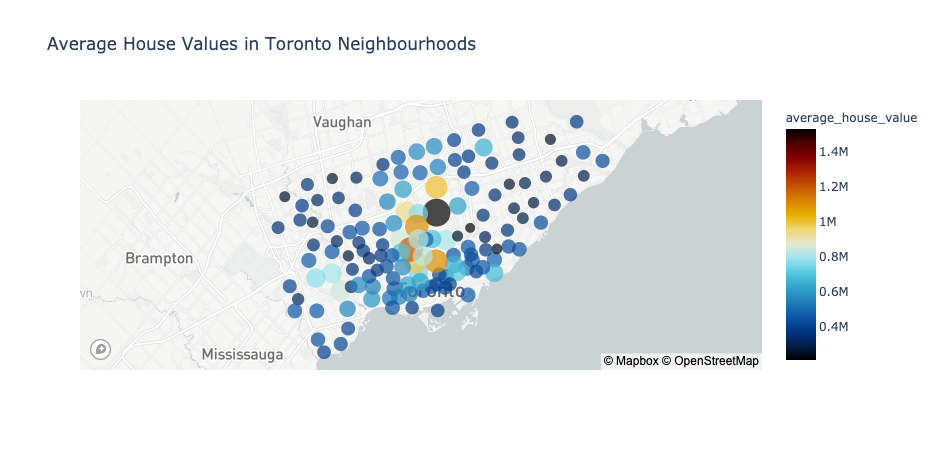

In [80]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    
    # Load neighbourhoods coordinates data 
    file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
    df_neighbourhood_locations = pd.read_csv(file_path)
    
    
    # Calculate the mean values for each neighborhood
    neighbourhood_mean_values = to_data.groupby("neighbourhood").mean()
    neighbourhood_mean_values.reset_index(inplace=True)
    
    
    # Drop the duplicate neighbourhood column
    toronto_neighbourhood_avg_values = neighbourhood_mean_values.drop(columns="neighbourhood")
    
    
    # Join the average values with the neighbourhood locations
    avg_value_neighbourhood_locations = pd.concat([df_neighbourhood_locations, toronto_neighbourhood_avg_values],
                                             axis = "columns",
                                             join="inner")
                        
    
    # Create a scatter mapbox to analyze neighbourhood info
    mapbox_scatterplot = px.scatter_mapbox(avg_value_neighbourhood_locations, 
                        lat="lat", 
                        lon="lon", 
                        size="average_house_value", 
                        color="average_house_value", 
                        zoom=9,
                        width=1500,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        title = "Average House Values in Toronto Neighbourhoods",
                        hover_name = "neighbourhood",
                        hover_data = ["single_detached_house", 
                                      "apartment_five_storeys_plus", 
                                      "movable_dwelling", 
                                      "semi_detached_house", 
                                      "row_house", 
                                      "duplex", 
                                      "apartment_five_storeys_less", 
                                      "other_house"])
    return mapbox_scatterplot

neighbourhood_map()
                       


## Bar & Line Chart Notes

I believe this is the "correct" code to create an argument for the "create_bar_chart" section, however, as you will notice below I have duplicate code defining the same variable (create_bar_chart) by year; "create_bar_chart_2001, create_bar_chart_2006, create_bar_chart_2011, and create_bar_chart_2016." 


I had a very difficult time using the code directly below to create and display the charts in columns/tabs section. Due to this, I decided to define the bar chart and line chart variables independently by year in order to have them displayed in Panel. 

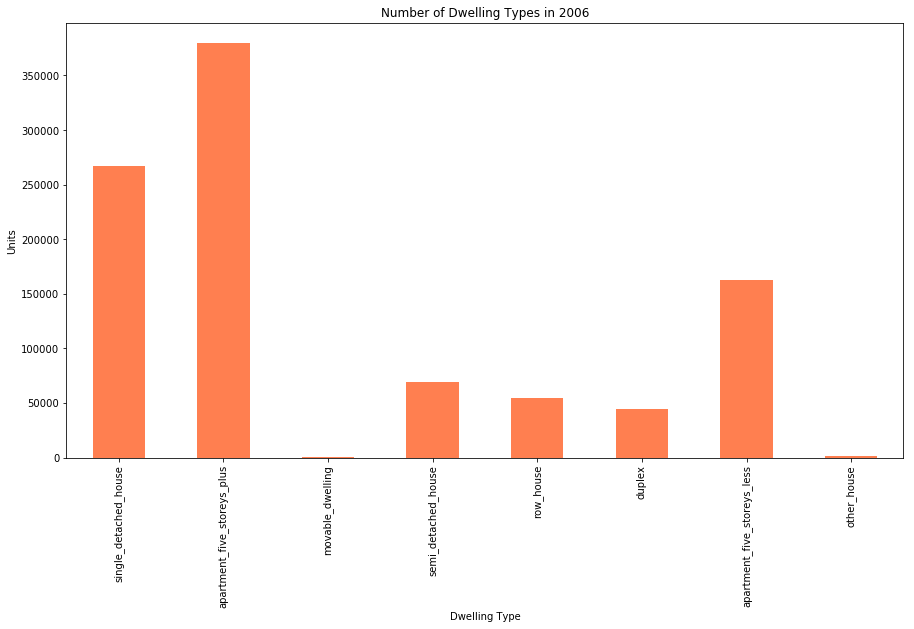

In [81]:
def create_bar_chart(year):
    """
    Create a barplot based in the data argument.
    """
    # Calculate the number of dwelling types units per year by using the groupby and sum function
    annual_dwelling_types = to_data.groupby('year').sum()
    
    # Display the dwelling unit types per year
    annual_dwelling_types
    
    # Create a bar chart per year to show the number of dwelling types
    types_of_dwellings = annual_dwelling_types.drop(columns=
                                                    ["average_house_value", 
                                                     "shelter_costs_owned", 
                                                     "shelter_costs_rented"])
    
    # Create an if-loop to display the bar charts for 2001, 2006, 2011, and 2016
    
    if year == 2001:
        
        # 2001 Bar Chart
        dwelling_types_2001 = types_of_dwellings.iloc[0].plot.bar(title="Number of Dwelling Types in 2001", 
                                                                  color="orangered", 
                                                                  figsize=(15,8))
        dwelling_types_2001.set_xlabel("Dwelling Type")
        dwelling_types_2001.set_ylabel("Units")
        return dwelling_types_2001
    
    elif year == 2006:
        
        # 2006 Bar Chart
        dwelling_types_2006 = types_of_dwellings.iloc[1].plot.bar(title="Number of Dwelling Types in 2006", 
                                                                  color="coral", 
                                                                  figsize=(15,8))
        dwelling_types_2006.set_xlabel("Dwelling Type")
        dwelling_types_2006.set_ylabel("Units")
        return dwelling_types_2006
    
    elif year == 2011:
        
        # 2011 Bar Chart
        dwelling_types_2011 = types_of_dwellings.iloc[2].plot.bar(title="Number of Dwelling Types in 2011", 
                                                                  color="lightcoral", 
                                                                  figsize=(15,8))
        dwelling_types_2011.set_xlabel("Dwelling Type")
        dwelling_types_2011.set_ylabel("Units")
        return dwelling_types_2011
    
    elif year == 2016:
        
        # 2016 Bar Chart
        dwelling_types_2016 = types_of_dwellings.iloc[3].plot.bar(title="Number of Dwelling Types in 2016", 
                                                                  color="pink", 
                                                                  figsize=(15,8))
        dwelling_types_2016.set_xlabel("Dwelling Type")
        dwelling_types_2016.set_ylabel("Units")
        return dwelling_types_2016
        
create_bar_chart(2006)


  

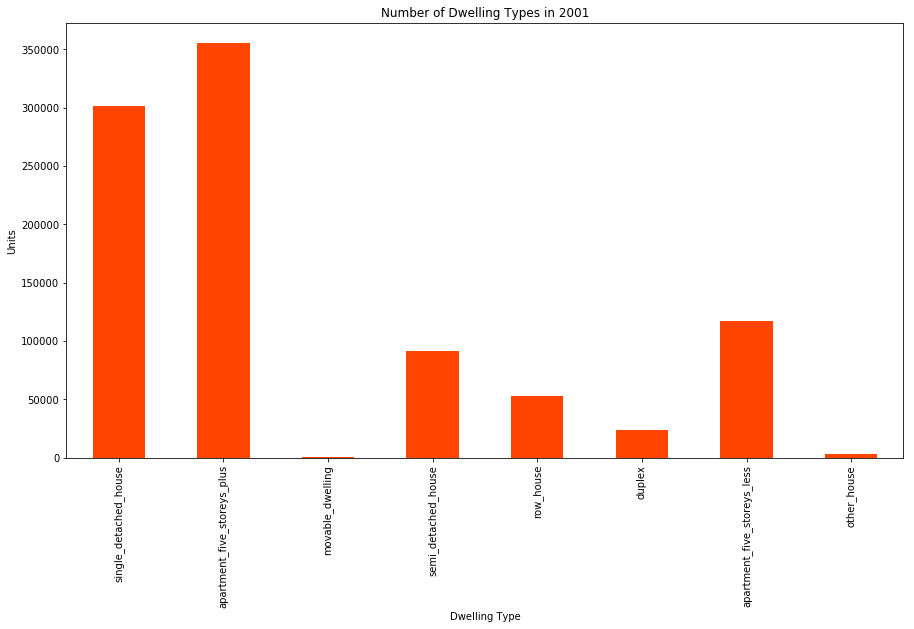

In [127]:
def create_bar_chart_2001():
    """
    Create the 2001 bar chart
    """
    # Calculate the number of dwelling types units per year by using the groupby and sum function
    annual_dwelling_types = to_data.groupby('year').sum()
    
    # Display the dwelling unit types per year
    annual_dwelling_types
    
    # Create a bar chart per year to show the number of dwelling types
    types_of_dwellings = annual_dwelling_types.drop(columns=
                                                    ["average_house_value", 
                                                     "shelter_costs_owned", 
                                                     "shelter_costs_rented"])
    # 2001 Bar Chart
    dwelling_types_2001 = types_of_dwellings.iloc[0].plot.bar(title="Number of Dwelling Types in 2001", 
                                                              color="orangered", 
                                                              figsize=(15,8))
    dwelling_types_2001.set_xlabel("Dwelling Type")
    dwelling_types_2001.set_ylabel("Units")
    return dwelling_types_2001

create_bar_chart_2001()

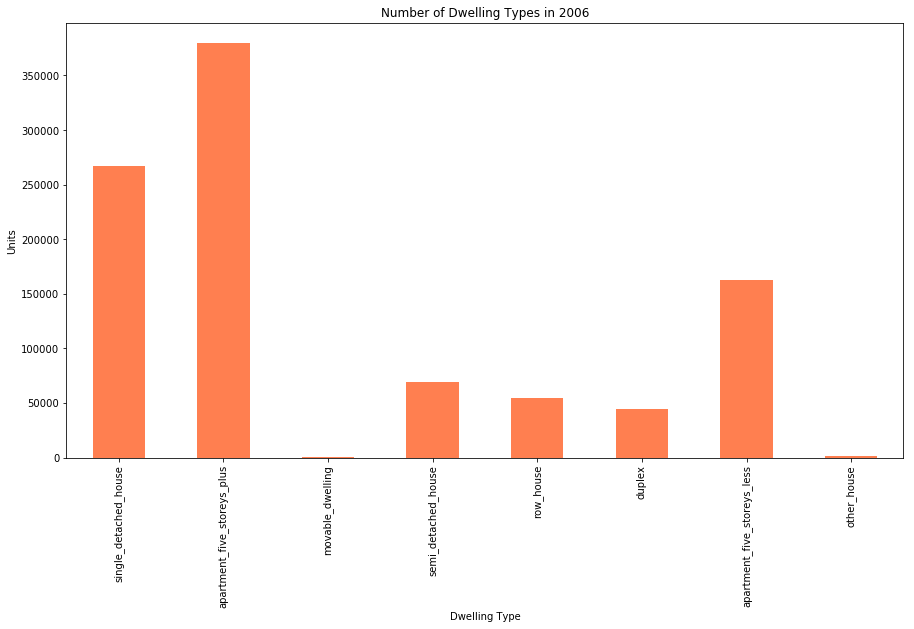

In [114]:
def create_bar_chart_2006():
    """
    Create the 2006 bar chart
    """
    # Calculate the number of dwelling types units per year by using the groupby and sum function
    annual_dwelling_types = to_data.groupby('year').sum()
    
    # Display the dwelling unit types per year
    annual_dwelling_types
    
    # Create a bar chart per year to show the number of dwelling types
    types_of_dwellings = annual_dwelling_types.drop(columns=
                                                    ["average_house_value", 
                                                     "shelter_costs_owned", 
                                                     "shelter_costs_rented"])
    # 2006 Bar Chart
    dwelling_types_2006 = types_of_dwellings.iloc[1].plot.bar(title="Number of Dwelling Types in 2006", 
                                                              color="coral", 
                                                              figsize=(15,8))
    dwelling_types_2006.set_xlabel("Dwelling Type")
    dwelling_types_2006.set_ylabel("Units")
    return dwelling_types_2006

create_bar_chart_2006()

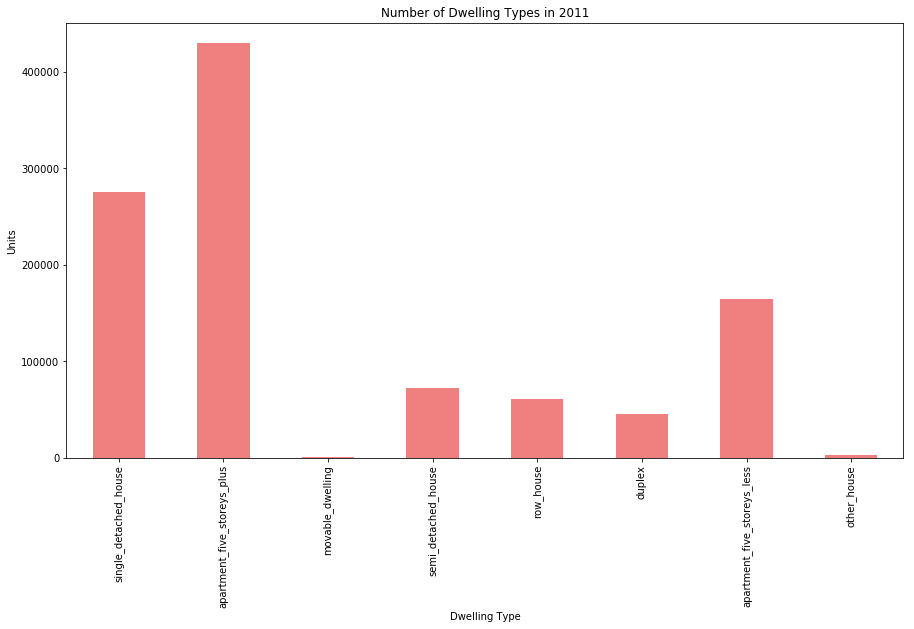

In [115]:
def create_bar_chart_2011():
    """
    Create the 2011 bar chart
    """
     # Calculate the number of dwelling types units per year by using the groupby and sum function
    annual_dwelling_types = to_data.groupby('year').sum()
    
    # Display the dwelling unit types per year
    annual_dwelling_types
    
    # Create a bar chart per year to show the number of dwelling types
    types_of_dwellings = annual_dwelling_types.drop(columns=
                                                    ["average_house_value", 
                                                     "shelter_costs_owned", 
                                                     "shelter_costs_rented"])
    # 2011 Bar Chart
    dwelling_types_2011 = types_of_dwellings.iloc[2].plot.bar(title="Number of Dwelling Types in 2011", 
                                                              color="lightcoral", 
                                                              figsize=(15,8))
    dwelling_types_2011.set_xlabel("Dwelling Type")
    dwelling_types_2011.set_ylabel("Units")
    return dwelling_types_2011

create_bar_chart_2011()

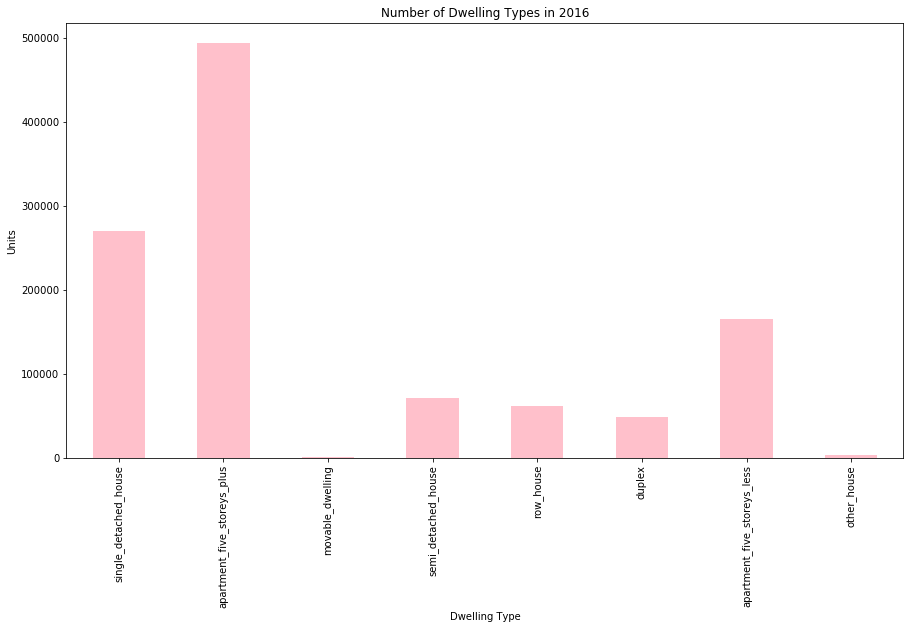

In [117]:
def create_bar_chart_2016():
    """
    Create the 2016 bar chart
    """
    # Calculate the number of dwelling types units per year by using the groupby and sum function
    annual_dwelling_types = to_data.groupby('year').sum()
    
    # Display the dwelling unit types per year
    annual_dwelling_types
    
    # Create a bar chart per year to show the number of dwelling types
    types_of_dwellings = annual_dwelling_types.drop(columns=
                                                    ["average_house_value", 
                                                     "shelter_costs_owned", 
                                                     "shelter_costs_rented"])
    # 2016 Bar Chart
    dwelling_types_2016 = types_of_dwellings.iloc[3].plot.bar(title="Number of Dwelling Types in 2016", 
                                                              color="pink", 
                                                              figsize=(15,8))
    dwelling_types_2016.set_xlabel("Dwelling Type")
    dwelling_types_2016.set_ylabel("Units")
    return dwelling_types_2016

create_bar_chart_2016()

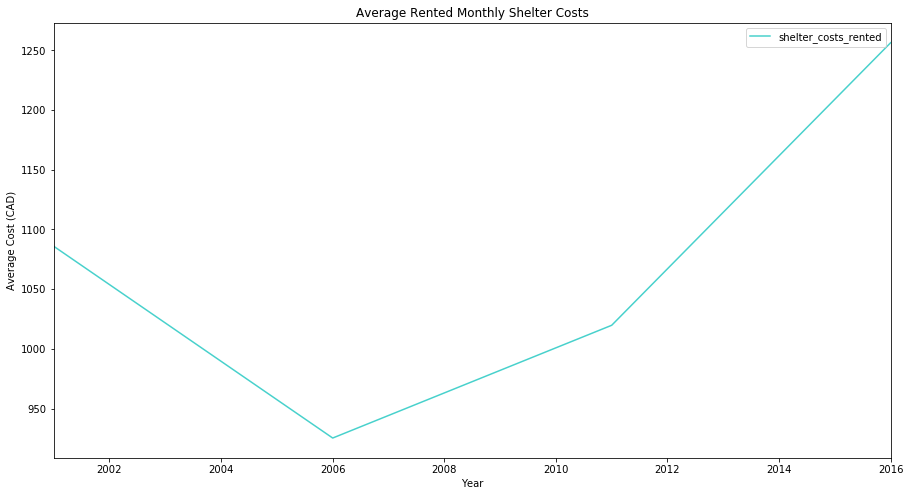

In [131]:
def create_rented_line_chart():
    """Create a line chart for Average Rented Monthly Shelter Costs"""
    
    # Line chart for rented dwellings
    rented_shelter_costs = average_monthly_shelter_costs["shelter_costs_rented"].plot.line(title="Average Rented Monthly Shelter Costs",
                                                                                           color="mediumturquoise",
                                                                                           figsize=(15,8),
                                                                                           legend=True)
    rented_shelter_costs.set_xlabel("Year")
    rented_shelter_costs.set_ylabel("Average Cost (CAD)")
    return rented_shelter_costs

create_rented_line_chart()                                                           

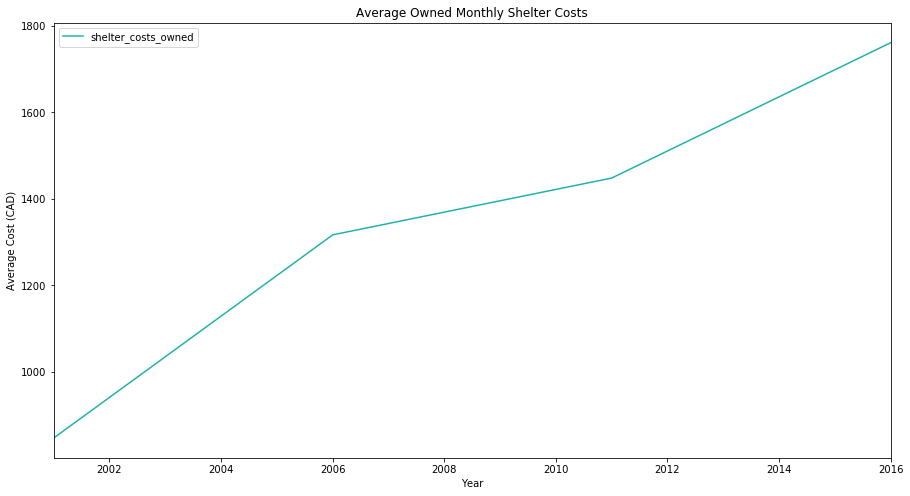

In [99]:
def create_owned_line_chart():
    """Create a line chart for Average Owned Monthly Shelter Costs"""
    
    # Line chart for owned dwellings
    owned_shelter_costs = average_monthly_shelter_costs["shelter_costs_owned"].plot.line(title="Average Owned Monthly Shelter Costs", 
                                                                                         color="lightseagreen",
                                                                                         figsize=(15,8),
                                                                                         legend=True)
    owned_shelter_costs.set_xlabel("Year")
    owned_shelter_costs.set_ylabel("Average Cost (CAD)")
    return owned_shelter_costs

create_owned_line_chart()

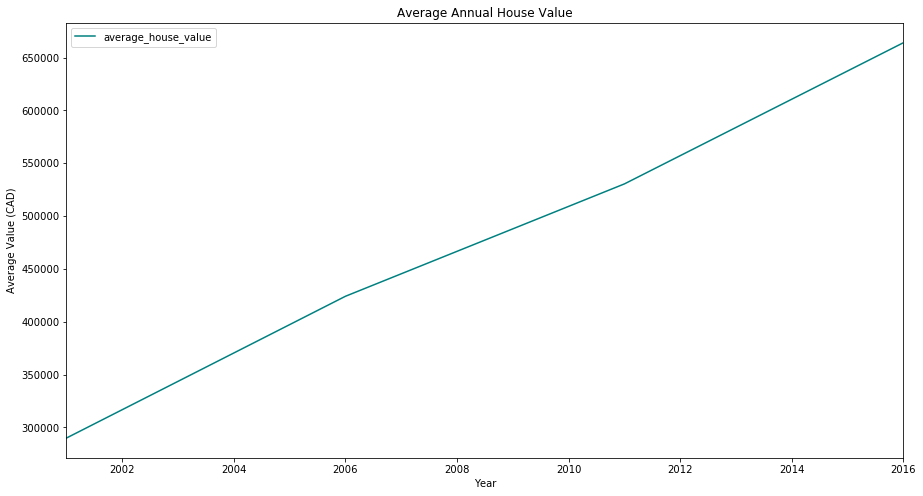

In [106]:
def average_house_value():
    """Average house values per year."""
    
    # Display the average house value 
    average_annual_house_value = average_dwelling_costs[["average_house_value"]]
    
    # Plot the average house value per year as a line chart
    annual_house_value_per_year = average_annual_house_value.plot.line(title="Average Annual House Value", 
                                                                       color="teal", 
                                                                       figsize=(15,8), 
                                                                       legend=True)
    annual_house_value_per_year.set_xlabel("Year")
    annual_house_value_per_year.set_ylabel("Average Value (CAD)")
    return annual_house_value_per_year

average_house_value()

In [16]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # Create a new DataFrame with the mean house values by neighbourhood per year
    avg_house_value_by_neighbourhood_df = to_data.groupby(["year", "neighbourhood"]).mean()
    
    # Display the appropriate columns; year, neighbourhood, and average house value
    avg_neighbourhood_house_value = avg_house_value_by_neighbourhood_df[["average_house_value"]]
    
    # Create a hvplot to create an interactive line chart of the average house value per neighbourhood
    neighbourhood_avg_value = avg_neighbourhood_house_value.hvplot.line("year", 
                                                                        groupby="neighbourhood", 
                                                                        width= 700, 
                                                                        color="crimson").opts(yformatter="%.0f")
    
    return neighbourhood_avg_value

average_value_by_neighbourhood()


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [17]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    
    # Fetch the data of all dwelling types per year 
    avg_dwelling_types_per_year_df = to_data.groupby(["year", "neighbourhood"]).mean()
    avg_annual_dwelling_types = avg_dwelling_types_per_year_df.drop(columns=["average_house_value", 
                                                                             "shelter_costs_owned", 
                                                                             "shelter_costs_rented"])
    
    # Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
    dwelling_types_avg = avg_annual_dwelling_types.hvplot.bar("year", 
                                                              groupby="neighbourhood", 
                                                              width=700,
                                                              height=700, 
                                                              rot=90)
    return dwelling_types_avg

number_dwelling_types()


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

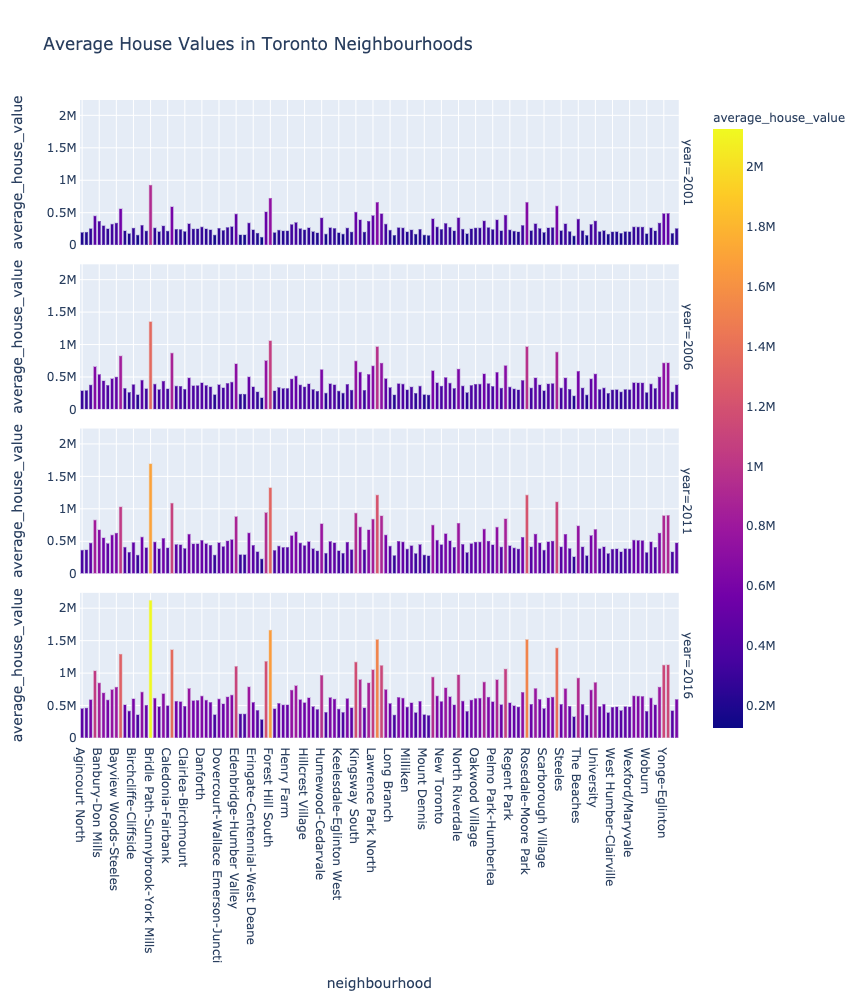

In [18]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # Fetch the data to plot the average house values for the neighbourhoods per year
    toronto_neighbourhoods = to_data.reset_index()
    
    # Create a bar chart row facet to plot the above data
    avg_to_house_values = px.bar(toronto_neighbourhoods, 
                                 title = "Average House Values in Toronto Neighbourhoods",
                                 x = "neighbourhood",
                                 y = "average_house_value",
                                 facet_row = "year",
                                 height = 1000,
                                 width = 1400,
                                 color= "average_house_value")
    return avg_to_house_values

average_house_value_snapshot()


In [55]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    # Plot the data for the top 10 expensive neighbourhoods
    most_expensive_neighbourhoods = top_10_most_expensive_neighbourhoods.hvplot.bar(title="Top 10 Most Expensive Neighbourhoods", 
                                                                                    x = "neighbourhood",
                                                                                    y = "average_house_value",
                                                                                    color="navy",
                                                                                    height=500,
                                                                                    rot=60).opts(yformatter="%.0f")
    return most_expensive_neighbourhoods

top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

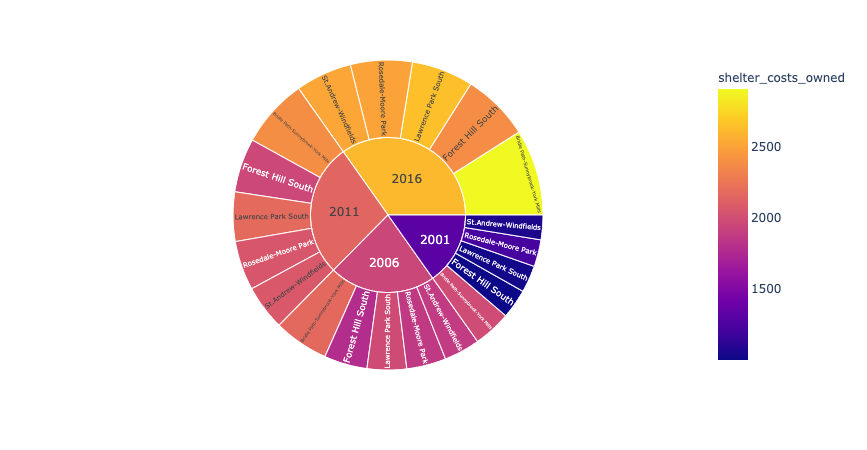

In [20]:
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # Fetch the data from all expensive neighbourhoods per year
    expensive_neighbourhoods = to_data.reset_index()
    
    # Sort the data to present the most expesnive neighbourhoods in ascending order
    most_expensive_neighbourhoods = expensive_neighbourhoods.sort_values(["year", "average_house_value"], 
                                                                         ascending=False).groupby("year").head()
    
    # Create the sunburst chart
    neighbourhood_sunburst_chart = most_expensive_neighbourhoods.sort_values(["year", "average_house_value"]) 
    expensive_to_neighbourhoods_subburstchart = px.sunburst(neighbourhood_sunburst_chart, 
                                                            path = ["year", "neighbourhood"], 
                                                            values = "average_house_value", 
                                                            hover_data = ["shelter_costs_owned", "shelter_costs_rented"], 
                                                            color = "shelter_costs_owned")
    return expensive_to_neighbourhoods_subburstchart

sunburts_cost_analysis()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

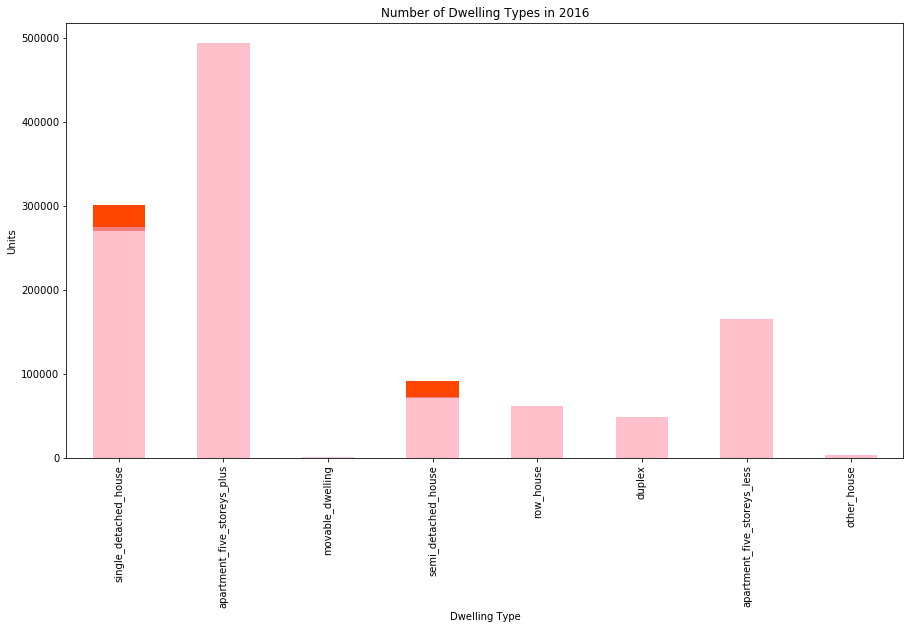

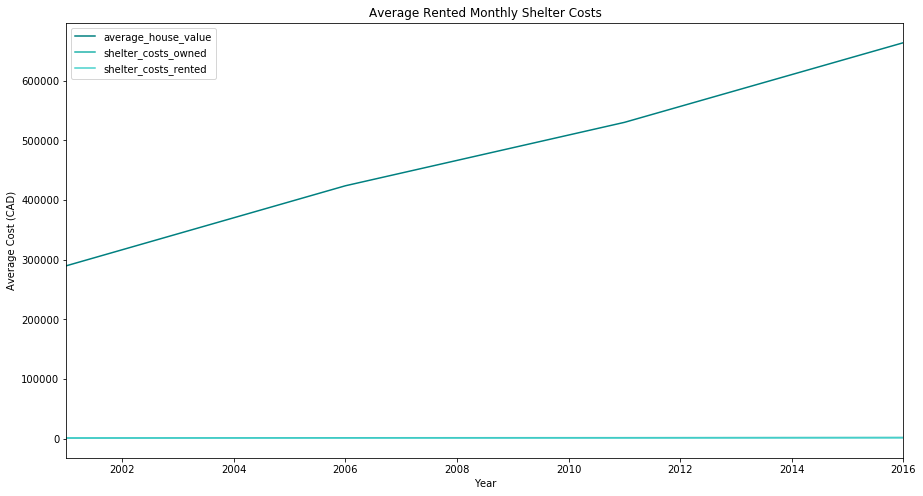

In [128]:
# Create a Title for the Dashboard
dashboard_title = pn.pane.Markdown("""#2001-2016 Real Estate Investment Analysis for the Toronto Market""")

# Create a Welcome text
welcome_text = pn.pane.Markdown(
    """
    This interactive dashboard will assist real estate investors identify potential opportunities present in the Toronto Market.
    Navigating through the available tabs, customers have the opportunity to explore and analyze various housing and neighbourhood
    data through the charts, maps, and interactive visualizations provided. 
    """)

# Create the tab layout for the dashboard

# Tab 1
welcome_tab_1 = pn.Row(pn.Column(dashboard_title, welcome_text), neighbourhood_map())

# Tab 2
overview_tab_2 = pn.Column("##Annual Market Overview for Toronto Homes",
                           "#2001 Houses Chart",
                           create_bar_chart_2001(),
                           "#2006 Houses Chart",
                           create_bar_chart_2006(),
                           "#2011 Houses Chart",
                           create_bar_chart_2011(),
                           "#2016 Houses Chart",
                           create_bar_chart_2016())

# overview_tab_2 = pn.Column("## Annual Housing Market Overview", create_bar_chart(2001))

# Tab 3
home_vs_shelter_costs_tab_3 = pn.Column("##Average Shelter Costs for Rented & Owned Homes vs. Average Home Value in Toronto",
                                        "##Average Annual House Value", 
                                        average_house_value(),
                                        "##Average Owned Monthly Shelter Costs", 
                                        create_owned_line_chart(),
                                        "##Average Rented Monthly Shelter Costs", 
                                        create_rented_line_chart())

# Tab 4
tab_4_description = pn.pane.Markdown(
    """
    ##To Navigate the Analysis:
    
    Use the drop down menu for both plots to display the different
    neighbourhood data.
    
    """)
neighbourhood_analysis_tab_4 = pn.Column(tab_4_description,
                                         "##Annual Average House Value Analysis",
                                         average_value_by_neighbourhood,
                                         "##Dwelling Type Average Value Analysis",
                                         number_dwelling_types,
                                         average_house_value_snapshot())
                                 
# Tab 6
top_10_barchart_descritption = pn.pane.Markdown(
    """
    This interactive bar chart may not display correctly on all screens. 
    Please use your cursor to drag the plot up and down to view the maximum
    & minimum neighbourhood prices.
    """)
expensive_neighbourhoods_tab_5 = pn.Row(pn.Column(
                                        "##Toronto's Top 10 Most Expensive Neighbourhoods",
                                        top_10_barchart_descritption,
                                        top_most_expensive_neighbourhoods(),
                                        "##Top 10 Most Expensive Neighbourhoods Cost Analysis",
                                        sunburts_cost_analysis()))


In [129]:
# Create the tabs for the dashboard
dashboard = pn.Tabs(("Welcome", welcome_tab_1), 
                    ("Toronto Market Overview", overview_tab_2),
                    ("Home Value vs. Shelter Costs", home_vs_shelter_costs_tab_3),
                    ("Toronto Neighbourhood Analysis", neighbourhood_analysis_tab_4),
                    ("High Priced Neighbourhoods", expensive_neighbourhoods_tab_5))
dashboard

Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Str(AxesSubplot)
        [3] Markdown(str)
        [4] Str(AxesSubplot)
        [5] Markdown(str)
        [6] Str(AxesSubplot)
        [7] Markdown(str)
        [8] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Str(AxesSubplot)
        [3] Markdown(str)
        [4] Str(AxesSubplot)
        [5] Markdown(str)
        [6] Str(AxesSubplot)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive33137')
                    [0] HoloViews(DynamicMap, name='interactive33137')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [3] Markdown(str)
        [4] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive33181')
                    [0] HoloViews(DynamicMap, name='interactive33181')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [5] Plotly(Figure)
    [4] Row
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] HoloViews(Bars)
            [3] Markdown(str)
            [4] Plotly(Figure)

## Serve the Panel Dashboard

In [124]:
dashboard.servable()

Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Str(AxesSubplot)
        [3] Markdown(str)
        [4] Str(AxesSubplot)
        [5] Markdown(str)
        [6] Str(AxesSubplot)
        [7] Markdown(str)
        [8] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive30607')
        [3] Markdown(str)
        [4] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive30615')
        [5] Markdown(str)
        [6] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive30623')
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive30634')
                    [0] HoloViews(DynamicMap, name='interactive30634')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [3] Markdown(str)
        [4] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive30678')
                    [0] HoloViews(DynamicMap, name='interactive30678')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                        [1] VSpacer()
        [5] Plotly(Figure, viewport={'xaxis.range': [-0.5, ...})
    [4] Row
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] HoloViews(Bars)
            [3] Markdown(str)
            [4] Plotly(Figure)

## Debugging

### Please use this section to display the bar and line charts in "Toronto Market Overview" tab & "Home Value vs. Shelter Costs" tab. 


Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [156]:
# Display the neighbourhood interactive scatter map
# neighbourhood_map()

In [155]:
# Display the 2001 bar chart
# create_bar_chart_2001()

In [154]:
# Display the 2006 bar chart
# create_bar_chart_2006()

In [153]:
# Display the 2011 bar chart
# create_bar_chart_2011()

In [152]:
# Display the 2016 bar chart
# create_bar_chart_2016()

In [151]:
# Display the line chart for: Average Rented Monthly Shelter Costs
# create_rented_line_chart() 

In [150]:
# Display the line chart for: Average Owned Monthly Shelter Costs
# create_owned_line_chart() 

In [149]:
# Display the line chart for: the Average House Value 
# average_house_value()

In [148]:
# Display the interactive hv line plot: for Average house values by neighbourhood
# average_value_by_neighbourhood()

In [147]:
# Display the hv bar plot for: Number of dwelling types per year
# number_dwelling_types()

In [146]:
# Display the row facet bar plot for: Average house value for all Toronto's neighbourhoods per year
# average_house_value_snapshot()

In [145]:
# Display the hv bar plot for: Top 10 most expensive neighbourhoods
# top_most_expensive_neighbourhoods()

In [144]:
# Display the sunburst chart
# sunburts_cost_analysis()